## Executive Summary

This analysis project has been designed to determine the differences in usage between casual and membership based users of the Cyclistic bike share system in Chicago, Illinois, USA. The analysis has been conducted in the effort to give recommendations the the company's marketing department so they can determine how best to convert casual users into members, as this is much better for profit generation as determined by the company's financial analysts. Key differences unearthed are that casual users use bikes for over 20 minutes for their average trip as opposed to around 12 minutes for members. Casuals use the bike share system for trips 37% on the weekened which is far higher than 24% of trips for members on weekends. The warmest months of the year show highest usage for all users. Route wise, scenic and leisure routes on the network are used far more by casual members around the waterfront, whereas members use the bikes for more transport based purposes during the week ie to get to and from work.

We recommend several measures to target casual members based on these findings.
- Offering sharper priced membership packages for casual users targeting longer duration rides.
- Create a campaign timed around May and June as these are the warmest months in Chicago, corresponding with the highest usage rates & maximising exposure to casual users we need to convert.
- Focus on weekend usage incentives targeted at casuals to become members, as this is when and how existing casuals are engaging with the bike share system. Aim to convert casual users based on their current behaviour trends.
- The most effective location to target casual users interacting with the system are along the waterfront of Chicago, focusing efforts physically at these stations or on users interactiving with the bike share at these locations will provide the best exposure to membership offerings.

Following the recommendations above will lead to effective targeting of current casual users to provide the best opportunity to convert them into ongoing paid members. These recommendations are based on the key usage differences between casual users and members, focusing the marketing teams effort to have the best opportunity to convert as many casual users as possible.

## Introduction. 

This case study looks at the question of determining the differences in usage between casual and member users of a bike sharing system (Cyclistic) in Chicago, Illinois. The idea is to find these differences so recommendations can be made to the company's marketing team on how to convert existing casual customers into paid members as financial analysts have determined this is the most profitable way forward for the company, Cyclistic.

Primarily the key business task of this analysis is, How do annual members and casual riders use Cyclistic bikes differently? 
From the outcome of analysis of this question recommendations will be made on how to best target casual riders to convert them to ongoing members. Teh campaign generated from these insghts will be undertaken by the Cyclistic marketing team.

### Data Source
This problem will be approached by looking at the most recent years worth of data for Cyclistic, note this company is fictional & part of Google's Data Analytics Capstone Course Project, data in use here for this application is from the real world, available from  Motivate International Inc. under this license (https://divvybikes.com/data-license-agreement) and is retrievable from https://divvy-tripdata.s3.amazonaws.com/index.html. The datasets provided for use here are about Divvy, the actual bike share platform in use in Chicago.

There are several limitations of note with this dataset worth pointing out. Member and casual data for instance is anonymised for privacy requirements. This means that unique IDs are not provided for users' rides on the bike share network. This leads to a limitation in drawing inferences from the data as we can only view each ride as it's own unique entry, we cannot link the rides of the same users on the network. We can only draw conclusions from overall member and casual users, we don't know how many users are on the network for instance, only the amount of rides being undertaken. This will not prohibit a detailed analysis of the data, but it is worth noting.

#### Importing the dataset
Gather the data in the system, merging 12 months of separated csv files into one combined data frame for accurate analysis. Note csv file data was separate for each month used. These csvs were merged prior to ,loading them into the data frame using Power Query to quickly output the new merged csv file. Which was tehn imported into the data frame as a sample, detailed below. Data used in this analysis is from April 2023 - March 2024. Noting that due to the size of the data in use, a random random sample of 25% of this data was determined sufficient to draw accurate conclusions on the dataset. This was done in an effort to condense and reduce file size, still leaving approx 5.75 million entries (bike trips). Leaving more than enough data to perform accurate analysis without binding operating system up running extended queries. Resorted to using pickle (pkl.) file type to speed up analysis after initial csv file loading, speeding up analysis processes significantly thanks to the smaller file size containing hte same data.

In [1]:
#packages for installation to complete analysis.
import pandas as pd
import numpy as np


In [462]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the CSV file into a DataFrame.
file_path = r"C:\Users\simon\Downloads\combined_months.csv"
df = pd.read_csv(file_path)

In [5]:
# Sample a fraction of the DataFrame (using 25% total data here as so much, random sample gives us what we need for analysis purposes).
sample_df = df.sample(frac=0.25, random_state=1)  # You can adjust 'frac' and 'random_state' as needed

In [7]:
# Save the sample DataFrame to the new CSV file
sample_file_path = r"C:\Users\simon\Downloads\sampled_combined_months_data.csv"
sample_df.to_csv(sample_file_path, index=False)

In [19]:
print(sample_df.head(10))

                  ride_id  rideable_type           started_at  \
825978   E88CAD50D95B0BA3   classic_bike  2023-05-21 09:38:47   
1520849  6F7F77B57F6251A0  electric_bike  2023-06-15 07:21:55   
5244148  F6698430BF2C6720   classic_bike  2024-02-16 09:20:24   
1280190  040EC09F8E286B8F  electric_bike  2023-06-04 17:45:03   
1347094  047C794BBDD09265   classic_bike  2023-06-23 17:40:17   
3016374  0E4332813D8B9A38  electric_bike  2023-08-08 17:21:11   
1889290  13E2EBD6E72D055D   classic_bike  2023-07-29 13:00:08   
269403   0B587FAF42263F3E   classic_bike  2023-04-11 18:59:17   
3531323  856BA4F3D65A9573   classic_bike  2023-09-07 11:37:12   
404038   D76C4D01AC61A5CB  electric_bike  2023-04-21 08:15:16   

                    ended_at           start_station_name start_station_id  \
825978   2023-05-21 09:44:29       Clark St & Schiller St     TA1309000024   
1520849  2023-06-15 07:32:33                          NaN              NaN   
5244148  2024-02-16 09:27:06        Kimbark Ave & 

In [13]:
df.describe(include='all') # showing sample data giving us well over 5m+ entries, more than enough for analysis.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5750177,5750177,5750177,5750177,4875727,4875727,4820951,4820951,5.750177e+06,5.750177e+06,5.742611e+06,5.742611e+06,5750177
unique,5750177,3,4845051,4857025,1601,1532,1614,1541,NaN,NaN,NaN,NaN,2
top,8FE8F7D9C10E88C7,electric_bike,2023-07-13 17:38:08,2023-12-08 09:54:28,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,2904674,8,18,64566,64566,65330,65330,NaN,NaN,NaN,NaN,3682050
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.190299e+01,-8.764696e+01,4.190333e+01,-8.764712e+01,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.499591e-02,2.724881e-02,5.435104e-02,6.901251e-02,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188098e+01,-8.766000e+01,4.188103e+01,-8.766014e+01,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.189918e+01,-8.764401e+01,4.190000e+01,-8.764410e+01,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193000e+01,-8.762991e+01,4.193059e+01,-8.762991e+01,NaN


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5750177 entries, 0 to 5750176
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 570.3+ MB
None


## Cleaning the data & creating the relevant data frame.
Note below steps outline process undertaken.
- Dropping longitude and latitude columns that don't contain relevant information.
- Making relevant columns from time columns.
- Separating start and end dates.
- Creating new month and day columns for further analysis.
- Dropping columns once all relevant data extracted from the original data frame. ie 'ride_id', 'started_at', 'ended_at'.

Creating new categories for further analysis.
-Ride distance from start stop location. Created from start/finsih coordinates for each trip using the Haversine function. Note this is a basic measure of distance travelled, as the function draws a line between start and end points. Not perfect but it's far more useful than using station names etc as many entries are missing station names, but all rides had complete coordinate start/stop data.
-Creating ride duration category, limited to max total ride time of 12 hours. Only outliers deemed to be above this ride duration.

In [21]:
# drop rows that don't have data around longitude and latitude end points, invalid ride data if we don't know where ride ended.
df.dropna(subset=["end_lat"], axis=0, inplace=True)
df.dropna(subset=["end_lng"], axis=0, inplace=True)

In [ ]:
# extractions of data. What we want to analyse, extract. time data, distance, ride duration.

In [23]:
# Convert columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [25]:
# Extract start dates from datetime columns
df['start_date'] = df['started_at'].dt.date

In [27]:
# Extract end dates from datetime columns
df['end_date'] = df['ended_at'].dt.date

In [29]:
# Extract times from datetime columns
df['start_time'] = df['started_at'].dt.time
df['end_time'] = df['ended_at'].dt.time

In [31]:
# Calculate ride duration (minutes)
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  # duration in minutes

In [33]:
#get day of the week rides are on (based on start day)
df['start_date'] = pd.to_datetime(df['start_date']) # convert start_date to datetime
df['day_of_week'] = df['start_date'].dt.day_name() # extract day of week.

In [63]:
# Haversine function defined.
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers (we could use 3956 for miles)
    r = 6371

    # Calculate the result
    return c * r

df['distance_km'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

In [73]:
df.head() # - note many rides showing from preview start and end in same location, we will determine if any difference b/w casual vs members on this.

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_time,end_time,ride_duration,day_of_week,distance_km
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,2023-04-02,2023-04-02,08:37:28,08:41:37,4.150000,Sunday,1.111949
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,2023-04-19,2023-04-19,11:29:02,11:52:12,23.166667,Wednesday,7.118733
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,2023-04-19,2023-04-19,08:41:22,08:43:22,2.000000,Wednesday,0.000000
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member,2023-04-19,2023-04-19,13:31:30,13:35:09,3.650000,Wednesday,1.111949
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,2023-04-19,2023-04-19,12:05:36,12:10:26,4.833333,Wednesday,1.655014


In [77]:
# Save the data frame to a CSV file 148 seconds. 
df.to_csv('bike_data_ready.csv', index=False)

In [79]:
df.to_pickle('pickle_bike_data_ready.pkl') # saved to pickle file (smaller) # 54 seconds.


In [129]:
df = pd.read_pickle('pickle_bike_data_ready.pkl') # reload doc ready to go again.

In [131]:
# drop columns we don;t need. ride_id, started_at, ended_at columns. either superfluous or extracted data we need now in other columns.
df.drop(columns=['ride_id', 'started_at', 'ended_at'], inplace=True)

In [133]:
df.head()

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_time,end_time,ride_duration,day_of_week,distance_km
0,electric_bike,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,2023-04-02,2023-04-02,08:37:28,08:41:37,4.150000,Sunday,1.111949
1,electric_bike,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,2023-04-19,2023-04-19,11:29:02,11:52:12,23.166667,Wednesday,7.118733
2,electric_bike,NaN,NaN,NaN,NaN,41.93,-87.66,41.93,-87.66,member,2023-04-19,2023-04-19,08:41:22,08:43:22,2.000000,Wednesday,0.000000
3,electric_bike,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member,2023-04-19,2023-04-19,13:31:30,13:35:09,3.650000,Wednesday,1.111949
4,electric_bike,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,2023-04-19,2023-04-19,12:05:36,12:10:26,4.833333,Wednesday,1.655014


In [135]:
# Drop rows where distance_km is 0 and ride_duration is less than 3
# Logic behind this is any rides less than 3 minutes that start and stop in same place likely false rides. Anything with 0 distance and longer duration we are assuming ride started and stopped in the same place. ie running an errand.
df = df[~((df['distance_km'] == 0) & (df['ride_duration'] < 3))]

In [145]:
# and we want the month for future analysis extracted from the dates for each entry.
# Convert the start_date column to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

In [147]:
# Extract the month from the start_date column
df['month'] = df['start_date'].dt.month

In [ ]:
# make month number (1-12) into month name.

In [181]:
# Dictionary to map month numbers to month names
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [183]:
# Map the month numbers to month names
df['month_name'] = df['month'].map(month_map)

In [187]:
df.head() # showcasing df with new column added, separated time columns, start_date, end_date, day_of_week, Month_name and created ride_duration and disntace_km columns.

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,start_time,end_time,ride_duration,day_of_week,distance_km,month,month_name
0,electric_bike,NaN,NaN,NaN,NaN,41.800000,-87.600000,41.790000,-87.600000,member,2023-04-02,2023-04-02,08:37:28,08:41:37,4.150000,Sunday,1.111949,4,April
1,electric_bike,NaN,NaN,NaN,NaN,41.870000,-87.650000,41.930000,-87.680000,member,2023-04-19,2023-04-19,11:29:02,11:52:12,23.166667,Wednesday,7.118733,4,April
3,electric_bike,NaN,NaN,NaN,NaN,41.920000,-87.650000,41.910000,-87.650000,member,2023-04-19,2023-04-19,13:31:30,13:35:09,3.650000,Wednesday,1.111949,4,April
4,electric_bike,NaN,NaN,NaN,NaN,41.910000,-87.650000,41.910000,-87.630000,member,2023-04-19,2023-04-19,12:05:36,12:10:26,4.833333,Wednesday,1.655014,4,April
5,electric_bike,NaN,NaN,NaN,NaN,41.910000,-87.630000,41.920000,-87.650000,member,2023-04-19,2023-04-19,12:17:34,12:21:38,4.066667,Wednesday,1.993759,4,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073048,classic_bike,Halsted St & Fulton St,23003,Franklin St & Illinois St,RN-,41.886871,-87.648089,41.891023,-87.635480,casual,2023-08-19,2023-08-19,00:25:55,00:37:13,11.300000,Saturday,1.141321,8,August
3073049,classic_bike,Halsted St & Fulton St,23003,Franklin St & Illinois St,RN-,41.886871,-87.648089,41.891023,-87.635480,member,2023-08-25,2023-08-25,12:50:44,13:00:51,10.116667,Friday,1.141321,8,August
3073050,electric_bike,Stockton Dr & Wrightwood Ave,13276,Wells St & Concord Ln,TA1308000050,41.931292,-87.638626,41.912133,-87.634656,member,2023-08-27,2023-08-27,17:58:22,18:05:23,7.016667,Sunday,2.155557,8,August
3073051,classic_bike,Wells St & Walton St,TA1306000011,McClurg Ct & Erie St,KA1503000041,41.899930,-87.634430,41.894503,-87.617854,member,2023-08-14,2023-08-14,07:52:55,08:02:11,9.266667,Monday,1.498807,8,August


In [189]:
df.to_pickle('complete_pickle_bike_data.pkl') # saved df in curremt state to pickle file (smaller than csv by far). 1/3 time to save/load.

## Analysis.

### Questions explored based on the data we have to determine how users differ.

1. What is the total number of recorded trips taken b/w casual vs members?
   64% trips undertaken by members, 36% therefore casuals in the overall data set.

2. Does the type of bike used differ between user?
   Slightly less electric bike usage in members, but not by much ie 49.25% vs 52.82% for casuals users, 50.75% classic bike for members vs 44% classic bike for casuals.
   
3. Does distance between user groups change as an average?
   Mean distance basically the same, at 2.18 vs 2.14 km respectively.
   
4. What is the average trip duration for each user type?
   There is a 21.5minute trip on average for the casual user, where members use bike on average for 12.5 minutes per trip. First real difference we're seeing between user types here.
   Looking further into this have created trip time 'bins' to categorise data. 'Ride Duration Distribution by User Type' shows overall      counts, evident that members use bikes far more frequently for shorter trips (up to 20 minutes) and casuals proportionally more for      longer duration journeys. ie 58% member rides are 0-10 min, 42% of casuals in this bracket. Nearly identical percentage for 10-20        minute group between member types at 29 & 28% journeys. 28% casual rides more than 20 minutes, only 14% members rides are.

5.  What is the most popular days of the week to ride for members vs casuals.
    Clear difference is usage here. Members more use through the week, Casuals heavier weekend users. 63% casual      rides during the       week. 37% on weekend. 76% member rides are during the week, 24% on weekend.

6. Does the month of the year effect riding preferences between user types?
   It does overall, but trajectories follow each other across both user types generally. June, July, August peak usage for both user types, December and January show the least usage.

7. What is the most popular time of day to ride for members vs casuals?
   Members seem to use bikes more during morning commutes. 6-10am timeslot shows the dominant usage. This demand slackens, until the commute home times in PM b/w 14.00-16.00 with 16.00-18.00 showing peak usage. Greater proportions of casuals using bikeshares b/w 22.00 and 02.00. Casuals are using bikes throughout day also but not to as great an extent.

8. Do the popular start and end points differ between user types?
   Resounding yes here. Strong usage concentrations of casual members at stations along waterfront ie more touristy areas it appears. Whereas members top stations are near major work areas or transport hubs in/near CBD of Chicago.

In [ ]:
# 1. % of trips completed by members vs casuals of overall rides.

In [159]:
df['member_casual'].value_counts()

member_casual
member    3610773
casual    2004784
Name: count, dtype: int64

In [3]:
3610773 + 2004784

5615557

In [5]:
3610773 / 5615557 * 100

64.29946308086625

In [ ]:
# 64% trips undertaken by members, 36% casuals.

In [ ]:
# 2. type of bike ridden b/w members vs casuals. No major differences seen here.

In [163]:
value_counts = df.groupby('member_casual')['rideable_type'].value_counts()
percentage_counts = value_counts.groupby(level=0).apply(lambda x: 100 * x / x.sum())
# results.
print("\nPercentage counts of 'rideable_type' based on 'member_casual':")
print(percentage_counts)
# slightly less electric bike usage in members, but not by much ie 49.25% vs 52.82 %, 50.75 classic bike for members vs 44% classic bike for casuals.


Percentage counts of 'rideable_type' based on 'member_casual':
member_casual  member_casual  rideable_type
casual         casual         electric_bike    52.819107
                              classic_bike     43.782971
                              docked_bike       3.397922
member         member         classic_bike     50.743483
                              electric_bike    49.256517
Name: count, dtype: float64


In [ ]:
# 3. avg distance ridden b/w members vs casuals*. Negligible differences in results for distance travelled per trip. Note this is as the crow flies, as distance is not true calculation of journey distance, we don't have enough info to determine that.

In [165]:
df.groupby('member_casual')['distance_km'].mean()
# negligible difference in results for distance travelled per trip.

member_casual
casual    2.180676
member    2.149750
Name: distance_km, dtype: float64

In [ ]:
# 4. avg duration of trip b/w members vs casuals. # 21.5 minute avg trip for casual user, 12.5 for members... significant differences here.

In [167]:
df.groupby('member_casual')['ride_duration'].mean


member_casual
casual    21.463761
member    12.447118
Name: ride_duration, dtype: float64

In [ ]:
# Cleanup undertaken below to further tighten up data used in this category. ie. delete negative duration ride values, can;t have negative value ride, deleted ride values over 12 hours also.

In [352]:
# Filter the DataFrame to include only rows where ride_duration is negative
negative_durations = df[df['ride_duration'] < 0]

# Count the number of negative values in the ride_duration column
negative_count = negative_durations['ride_duration'].count()

# Display the result
print("Count of negative ride_duration values:", negative_count)

# dropping negative values. # 236 of these but skewing data potentially.
df = df[~((df['ride_duration'] < 0))]
# after this execution, 0 negative values.

Count of negative ride_duration values: 236


In [354]:
##_____Count of values greater than 720 for duration, that's greater than 12 hours ... unlikely anyone using bikes on hire for more than 12hrs at a time.
# Filter the DataFrame to include only rows where ride_duration is negative
high_durations = df[df['ride_duration'] > 1440/2]

# Count the number of negative values in the ride_duration column
high_durations_count = high_durations['ride_duration'].count()

# Display the result
print("Count of high ride_duration values:", high_durations_count)
# 3158 high count values (over 12 hrs)
df = df[~((df['ride_duration'] > 720))]

Count of high ride_duration values: 3158
Count of high ride_duration values: 3158


In [370]:
# drop values over 12 hours / 720 minutes.
df = df[~((df['ride_duration'] > 720))]

In [406]:
print(df['ride_duration'].describe())

count    5.612163e+06
mean     1.507749e+01
std      2.153987e+01
min      0.000000e+00
25%      5.716667e+00
50%      9.833333e+00
75%      1.728333e+01
max      7.194333e+02
Name: ride_duration, dtype: float64


In [468]:
#create bins to show ride duration counts on a chart to see ride length distributions.

bins = [0, 10, 20, 30, 60, float('inf')]
bin_labels = ['0-9.99', '10.00-19.99', '20-29.99', '30-59.99', '60+']

In [472]:
# Categorize the ride_duration into bins
df['ride_duration_bins'] = pd.cut(df['ride_duration'], bins=bins, labels=bin_labels)

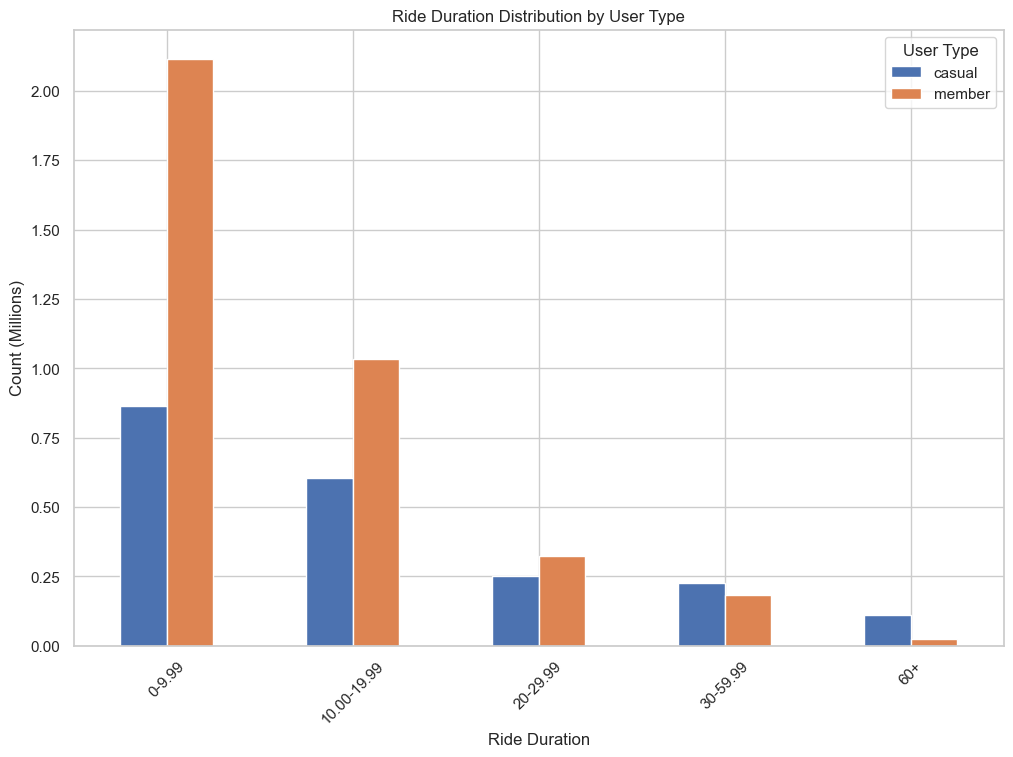

In [500]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Count the number of rides in each bin, split by member_casual
counts = df.groupby(['ride_duration_bins', 'member_casual']).size().unstack()

# Plot
ax = counts.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('Ride Duration')
plt.ylabel('Count (Millions)')
plt.title('Ride Duration Distribution by User Type')
plt.xticks(rotation=45)
plt.legend(title='User Type')

# Define a formatter function
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{x * 1e-6:.2f}'

# Set y-axis formatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions))

plt.show()

In [506]:
# % of each category for where their ride duration falls.
value_counts = df.groupby('member_casual')['ride_duration_bins'].value_counts()
percentage_counts = value_counts.groupby(level=0).apply(lambda x: 100 * x / x.sum())
# results.
print("\nPercentage counts of 'ride_duration_bins ' based on 'member_casual':")
print(percentage_counts)


Percentage counts of 'ride_duration_bins ' based on 'member_casual':
member_casual  member_casual  ride_duration_bins
casual         casual         0-9.99                41.943360
                              10.00-19.99           29.356956
                              20-29.99              12.252407
                              30-59.99              11.017712
                              60+                    5.429565
member         member         0-9.99                57.471789
                              10.00-19.99           28.081678
                              20-29.99               8.768236
                              30-59.99               4.985015
                              60+                    0.693281
Name: count, dtype: float64


##### Ride Duration Analysis
As a percentage of the overall ride count, members use bikes more for shorter trips. 57% of rides being less than 10 minutes. Only 41% of rides for casual users are under 10 minutes.

10-20 minute rides basically identical as a % for both groups around 28 & 29 minutes respectively.

Approx 14% of member rides are more than 20 minutes, 28%+ of casual rides are more than 20 minutes. Significant differences here.

Casuals riding for longer duration.A few options for strategy here.
advertise appeal of using bikes for shroter rides, members seem to like this more than casuals.
convert 10-20 minute ride users to members as usage rates practically the same compared to members (as a % of voerall ride count based on membership type).
advertise deals to become members for thos who enjoy longer rides.




In [428]:
df.to_pickle('pickle_bike_data_ready_cleaned_duration_data.pkl') # saved to pickle file (smaller) # 49 seconds.

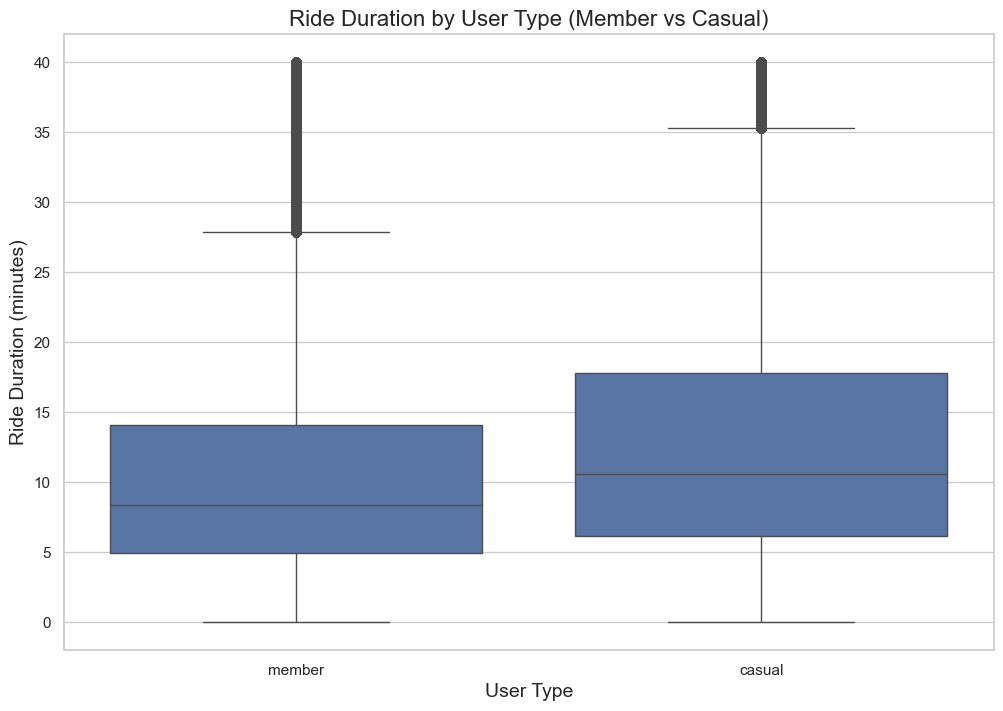

In [530]:
# Filter the DataFrame to include only ride durations up to 40 minutes, 40 minutes as captures full IQR + lower and upper extremes for both data sets.
df_filtered = df[(df['ride_duration'] > 0) & (df['ride_duration'] <= 40)]

# Create the boxplot with the filtered data
plt.figure(figsize=(12, 8))
sns.boxplot(x='member_casual', y='ride_duration', data=df_filtered)

# Titles and labels
plt.title('Ride Duration by User Type (Member vs Casual)', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Ride Duration (minutes)', fontsize=14)

# Display the plot
plt.show()

In [ ]:
#data somewhat overlaps between member and casual users. Means not too dissimilar,  but casual users do ride for longer than member type users, as shown by distribution plot above.

In [454]:
df = pd.read_pickle('pickle_bike_data_ready.pkl') # reload doc ready to go again.

In [ ]:
# 5. most popular days of the week to ride members vs casuals.

In [456]:
# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical type with the defined order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Group by 'member_casual' and 'day_of_week' and count occurrences
day_of_week_counts = df.groupby(['member_casual', 'day_of_week']).size().reset_index(name='count')

# Pivot the data for easier plotting
pivot_df = day_of_week_counts.pivot(index='day_of_week', columns='member_casual', values='count').fillna(0)

C:\Users\simon\AppData\Local\Temp\ipykernel_6992\2585858735.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_counts = df.groupby(['member_casual', 'day_of_week']).size().reset_index(name='count')


<Figure size 1400x700 with 0 Axes>

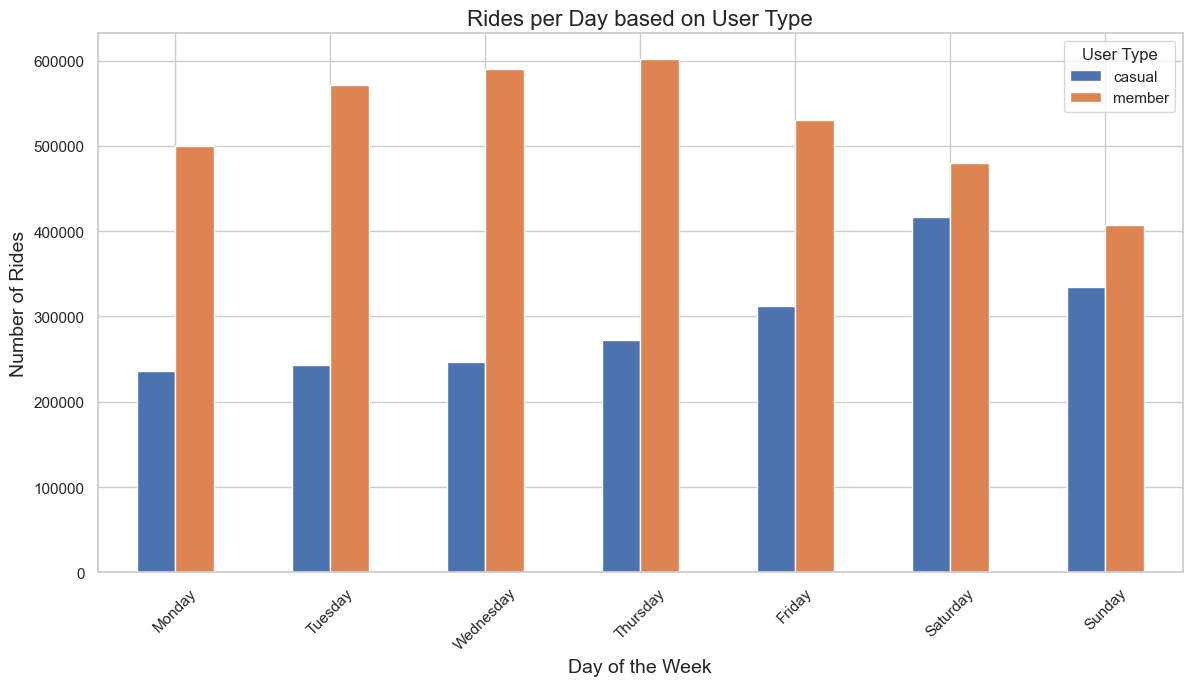

In [460]:
# Plot the data as a bar plot
plt.figure(figsize=(14, 7))
pivot_df.plot(kind='bar', stacked=False, figsize=(14, 7))

# Set plot labels and title
plt.title('Rides per Day based on User Type', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='User Type')

# Show the plot
plt.show()

In [ ]:
# Above shows weekly usage much higher (somewhere close to double) of members using bikes compared to casual users. 
# Weekends though are much closer suggesting many more casual users using bikes for leisure on weekend. Maybe members using bike for utilitarain means during working week.


In [524]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,start_date,end_date,start_time,end_time,ride_duration,day_of_week,distance_km,ride_duration_bins
0,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NaN,NaN,NaN,NaN,41.80,-87.60,...,-87.60,member,2023-04-02,2023-04-02,08:37:28,08:41:37,4.150000,Sunday,1.111949,0-9.99
1,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NaN,NaN,NaN,NaN,41.87,-87.65,...,-87.68,member,2023-04-19,2023-04-19,11:29:02,11:52:12,23.166667,Wednesday,7.118733,20-29.99
2,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NaN,NaN,NaN,NaN,41.93,-87.66,...,-87.66,member,2023-04-19,2023-04-19,08:41:22,08:43:22,2.000000,Wednesday,0.000000,0-9.99
3,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NaN,NaN,NaN,NaN,41.92,-87.65,...,-87.65,member,2023-04-19,2023-04-19,13:31:30,13:35:09,3.650000,Wednesday,1.111949,0-9.99
4,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NaN,NaN,NaN,NaN,41.91,-87.65,...,-87.63,member,2023-04-19,2023-04-19,12:05:36,12:10:26,4.833333,Wednesday,1.655014,0-9.99


In [528]:
# % of each category for which day the ride falls.

import pandas as pd

# Define the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical type with the specified order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)

# Calculate the percentage of trips per day of the week for each 'member_casual' category
percentage_counts = df.groupby(['member_casual', 'day_of_week']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())

# Round the percentages to one decimal place, keeping it neat.
percentage_counts = percentage_counts.round(1)

# Convert to DataFrame for better visualization if needed
percentage_counts_df = percentage_counts.unstack().fillna(0)

# Results
print("\nPercentage counts of 'day_of_week' based on 'member_casual':")
print(percentage_counts_df)


Percentage counts of 'day_of_week' based on 'member_casual':
day_of_week                  Monday  Tuesday  Wednesday  Thursday  Friday  \
member_casual member_casual                                                 
casual        casual           11.4     11.8       12.0      13.2    15.1   
member        member           13.6     15.5       16.0      16.3    14.4   

day_of_week                  Saturday  Sunday  
member_casual member_casual                    
casual        casual             20.2    16.3  
member        member             13.0    11.1  


In [ ]:
# 63% casual rides during the week. 37% on weekend,
# 76% member rides during the week, 24% on weekend.

In [ ]:
# 6. most popular month of the year to ride members vs casual.

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Group by month and member status and count the entries
monthly_counts = df.groupby(['month_name', 'member_casual']).size().reset_index(name='counts')

In [195]:
# Create a categorical type for months to ensure they are ordered chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts['month_name'] = pd.Categorical(monthly_counts['month_name'], categories=month_order, ordered=True)

In [197]:
# Sort by the ordered month_name
monthly_counts = monthly_counts.sort_values('month_name')

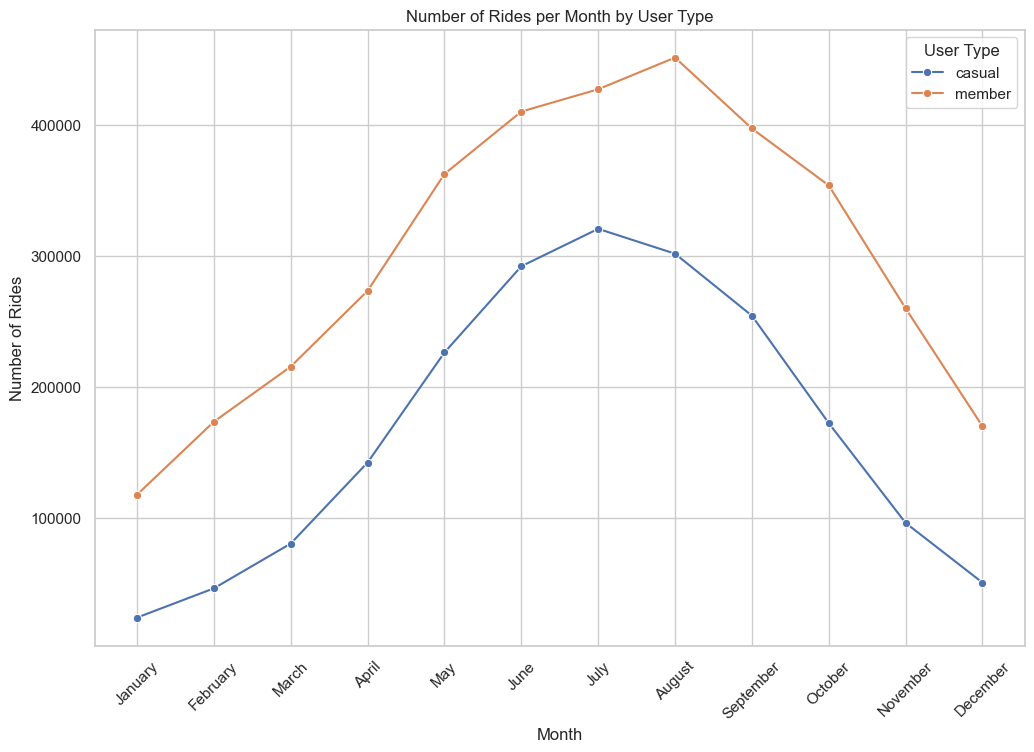

In [430]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(x='month_name', y='counts', hue='member_casual', data=monthly_counts, marker='o')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Number of Rides per Month by User Type')
plt.xticks(rotation=45)
plt.legend(title='User Type')

# Show the plot
plt.show()

In [ ]:
# June-September most popular months of the year to ride for both user types, this directly corresponds with warmest months of the year also. ie quick search temp averages. https://www.weather.gov/lot/ord_rfd_monthly_yearly_normals

In [ ]:
# 7. most popular time of day to ride members vs casuals.

In [207]:
# Extract the hour from 'start_time'
df['start_hour'] = pd.to_datetime(df['start_time'], format='%H:%M:%S').dt.hour

In [ ]:
# Create bins for 2-hour increments, 2hr bins will show ride distributions effectively.
bins = list(range(0, 25, 2))  # Create bins from 0 to 24 in increments of 2. 25 is the endpoint, exclusive.
labels = [f'{str(b).zfill(2)}:00-{str(b+1).zfill(2)}:59' for b in bins[:-1]]

In [ ]:
df['time_bin'] = pd.cut(df['start_hour'], bins=bins, labels=labels, right=False, include_lowest=True) # creates time_bin column in df. mutually exclusive 2 hour intervals, alle ntries are nwo asigned to these.
# picture for this.

In [239]:
df.head(1000000) # showing start_hour and time_bin created.

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,...,end_date,start_time,end_time,ride_duration,day_of_week,distance_km,month,month_name,start_hour,time_bin
0,electric_bike,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.60,member,...,2023-04-02,08:37:28,08:41:37,4.150000,Sunday,1.111949,4,April,8,08:00-09:59
1,electric_bike,NaN,NaN,NaN,NaN,41.87,-87.65,41.93,-87.68,member,...,2023-04-19,11:29:02,11:52:12,23.166667,Wednesday,7.118733,4,April,11,10:00-11:59
3,electric_bike,NaN,NaN,NaN,NaN,41.92,-87.65,41.91,-87.65,member,...,2023-04-19,13:31:30,13:35:09,3.650000,Wednesday,1.111949,4,April,13,12:00-13:59
4,electric_bike,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.63,member,...,2023-04-19,12:05:36,12:10:26,4.833333,Wednesday,1.655014,4,April,12,12:00-13:59
5,electric_bike,NaN,NaN,NaN,NaN,41.91,-87.63,41.92,-87.65,member,...,2023-04-19,12:17:34,12:21:38,4.066667,Wednesday,1.993759,4,April,12,12:00-13:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027346,electric_bike,NaN,NaN,NaN,NaN,41.88,-87.61,41.90,-87.62,casual,...,2023-05-30,18:23:46,18:40:09,16.383333,Tuesday,2.372956,5,May,18,18:00-19:59
1027347,electric_bike,NaN,NaN,NaN,NaN,41.93,-87.66,41.95,-87.65,member,...,2023-05-22,07:58:36,08:08:09,9.550000,Monday,2.372730,5,May,7,06:00-07:59
1027348,electric_bike,NaN,NaN,NaN,NaN,41.95,-87.77,41.95,-87.74,member,...,2023-05-22,17:33:18,17:41:47,8.483333,Monday,2.480965,5,May,17,16:00-17:59
1027350,electric_bike,NaN,NaN,NaN,NaN,41.93,-87.64,41.93,-87.69,member,...,2023-05-10,18:17:46,18:32:54,15.133333,Wednesday,4.136239,5,May,18,18:00-19:59


In [215]:
# Group by 'member_casual' and 'time_bin' and count occurrences
time_bin_counts = df.groupby(['member_casual', 'time_bin']).size().reset_index(name='count')

C:\Users\simon\AppData\Local\Temp\ipykernel_6992\1509038550.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_bin_counts = df.groupby(['member_casual', 'time_bin']).size().reset_index(name='count')


In [217]:
# Pivot the data for easier plotting
pivot_df = time_bin_counts.pivot(index='time_bin', columns='member_casual', values='count').fillna(0)


In [219]:
# Reset index to use 'time_bin' as a column
pivot_df = pivot_df.reset_index()

In [221]:
# Melt the DataFrame for plotting
melted_df = pivot_df.melt(id_vars='time_bin', var_name='member_casual', value_name='count')

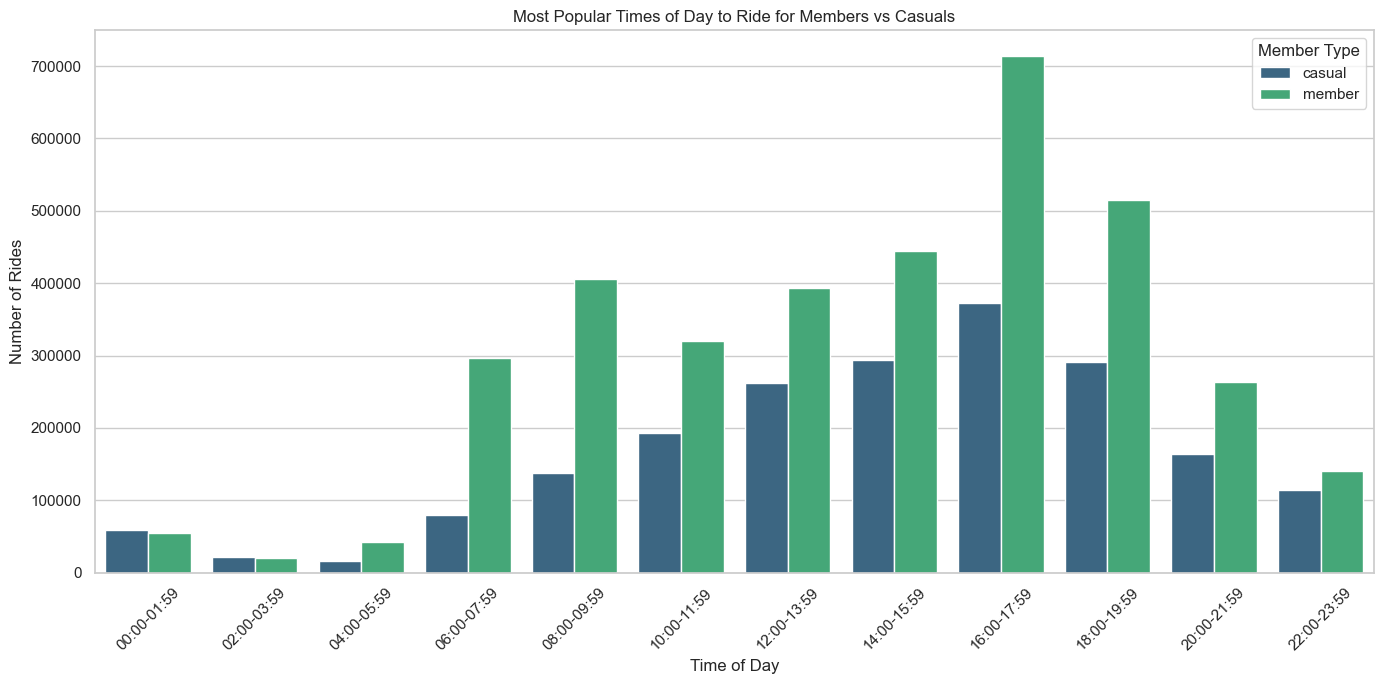

In [223]:
# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=melted_df, x='time_bin', y='count', hue='member_casual', palette='viridis')

# Customize the plot
plt.title('Most Popular Times of Day to Ride for Members vs Casuals')
plt.xlabel('Time of Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Member Type')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# analysis. Members seem to use bikes more during morning commutes. 6-10am timeslots dominant. slackens again for members until likely commute home times in PM 14.00-16.00 
# casual members have low use from 6.00am increasing in linear fashion until peak 16.00 - 18.00,
# at night greater proportions of casuals using bikeshares b/w 22.00 and 02.00 than members as a proportion of total users for each category.

In [225]:
df.to_pickle('complete_pickle_bike_data.pkl') # saved to pickle file (smaller) # 48 seconds.

In [ ]:
# 8. most popular start and end points (stations).

In [247]:
# Group by start_station_name and member_casual, then count occurrences
station_counts = df.groupby(['start_station_name', 'member_casual']).size().reset_index(name='counts')

In [249]:
# Get top 10 start stations for each member_casual category
top_stations_member = station_counts[station_counts['member_casual'] == 'member'].nlargest(10, 'counts')
top_stations_casual = station_counts[station_counts['member_casual'] == 'casual'].nlargest(10, 'counts')

In [251]:
# Display the results for members
print("Top 10 Start Stations for Members:")
print(top_stations_member)

Top 10 Start Stations for Members:
                start_station_name member_casual  counts
390   Clinton St & Washington Blvd        member   26907
894       Kingsbury St & Kinzie St        member   26403
336              Clark St & Elm St        member   24561
382        Clinton St & Madison St        member   21505
2893         Wells St & Concord Ln        member   21103
2895             Wells St & Elm St        member   20400
2823      University Ave & 57th St        member   19064
131           Broadway & Barry Ave        member   18705
1059      Loomis St & Lexington St        member   17648
237            Canal St & Adams St        member   17390


In [253]:
# Top Results for casuals.
print("\nTop 10 Start Stations for Casual Users:")
print(top_stations_casual)


Top 10 Start Stations for Casual Users:
                      start_station_name member_casual  counts
2786             Streeter Dr & Grand Ave        casual   45576
534    DuSable Lake Shore Dr & Monroe St        casual   30216
1148               Michigan Ave & Oak St        casual   22527
536   DuSable Lake Shore Dr & North Blvd        casual   20267
1160                     Millennium Park        casual   19715
2628                      Shedd Aquarium        casual   17513
2794                 Theater on the Lake        casual   16394
542                       Dusable Harbor        casual   15331
1178                     Montrose Harbor        casual   12053
18                     Adler Planetarium        casual   11947


In [257]:
# members highest station start points have more evenly spread dispersel of stations throughout the city than casual users. from names too casual users more tourist hotspots.
# 45k+ counts for casuals, 30K for 2nd, very strong usage concentrations.
#  maps search of top 3 start stations for each member type. members are near major work areas or transport hubs near cbd of chicago.
# casuals along waterfront overlooking lake michigan and looks like the leisurely/more touristy area for usage. high concentration of usage in this area.

In [ ]:
# 9. count members vs casuals who start / finish journey at same place on same ride.
# Data displayed no differnece between user types here.

In [265]:
# Step 1: Filter the DataFrame where ride_duration equals 0
filtered_df = df[df['ride_duration'] == 0]

# Step 2: Group by member_casual and count occurrences of rides with duration 0
grouped_counts = filtered_df.groupby('member_casual').size().reset_index(name='count_ride_duration_0')

# Step 3: Calculate the total number of rides for each member_casual category
total_rides = df.groupby('member_casual').size().reset_index(name='total_rides')

# Step 4: Merge the counts with total rides
merged_df = pd.merge(grouped_counts, total_rides, on='member_casual')

# Step 5: Calculate the percentage of rides with duration 0
merged_df['percentage'] = (merged_df['count_ride_duration_0'] / merged_df['total_rides']) * 100

# Display the results
print(merged_df)

  member_casual  count_ride_duration_0  total_rides  percentage
0        casual                    263      2004784    0.013119
1        member                    400      3610773    0.011078


In [ ]:
# no real difference. premise for exploring this was to determine if there would be a difference perhaps in members vs casuals doing round trip back to their same start location, no major difference shown though.

## Recommendations

It is advised to focus on converting casual users into members most effectively by utilising recommendations on offer below.

1. Offering packages for users targeting longer duration rides, as casuals are using bikes for nearly twice as long per trip compared to members. The utilitarian capabilities of the bike hire system could also be highlighted for effective commuting and not just for more leisurely weekend rides.

2. A campaign or incentives offering membership could be used when most amount of rides are occurring on the ride share system. The campaign should be targeted around May and June as these are the warmest months in Chicago and also correspond with the highest usage rates. Maximising exposure to converting casual patrons as most are ont eh network and using it at this time.

3. Casual users' rides are occurring 37% of the time on the weekend compared to 24% for members. Attempts to convert casuals to members should also focus on weekend usage incentives to become members when the existing casuals are engaging with the bike share system. This would aim to convert casual users based on their current behaviour trends.

4. The main start finish points for casuals are in the waterfront sector of the city, targeting these stations or casual patrons using the service from these points with a campaign aimed at converting them into paid  memberships will be the most effective place to target the users we wish to convert.